In [183]:

# %%

import numpy as np
import matplotlib.pyplot as plt # to visualize plot
from copy import deepcopy
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')


In [184]:

k=int(input("Enter No. of clusters : ")) # Number of cluster input
n=int(input("Enter count of data : ")) # Number of data points input


In [185]:
# printing input data
print("No. of clusters entered : ",k)
print("Count of data entered : ",n)


No. of clusters entered :  3
Count of data entered :  500


In [186]:
# making synthetic clsuters
data,_ = make_blobs(n_samples=n,n_features=2,centers=k)
X1,X2=data[:,0],data[:,1]


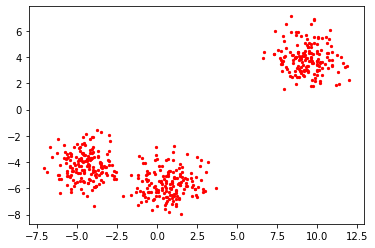

In [187]:
# plotting the points
plt.scatter(X1, X2 , c='red', s=5)
plt.show()
data=[]
for i in range(n):
    data.append([X1[i],X2[i]])



In [188]:
# selecting random points as centres
C = np.random.randint(0, n, size=k)
centroid=[]
for c in C:
    centroid.append([X1[c],X2[c]])
centroid=np.array(centroid)
centroid

array([[ 9.41513139,  4.73198427],
       [-5.29296754, -4.41738765],
       [-4.38305532, -6.55399408]])

In [189]:
# defining function to calculate euclidian distance between 2 points
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [190]:
# calculating error
C_old = np.zeros(centroid.shape)
error = dist(centroid, C_old, None)
error

14.857025462353057

In [191]:
# creating empty array to store cluster number 
clusters = np.zeros(len(data))


In [192]:
# Loop will run until error is too small i.e the old and new centroids are same
while error >0.0001:
    for i in range(len(data)):
        distances = [dist(data[i],C,0) for C in centroid ]
        
        cluster = np.argmin(distances)
        
        clusters[i] = cluster
        
    C_old = deepcopy(centroid)
    
    for i in range(k):
        points = [data[i] for i in range(len(data)) if k==clusters[i]]

        centroid[i] = np.mean(points)
     
    error = dist(centroid, C_old, None)

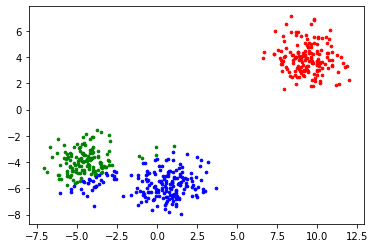

In [193]:
# visulaizing the results
colors = ['r', 'g', 'b', 'y', 'c', 'm','black','orange']
for i in range(k):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='y')